<a href="https://colab.research.google.com/github/Soares-remootFR/Metrics_RFV/blob/main/RID85524_Desafio07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de análise das métricas RFV

##Modelo de Clustering

Utilizando um modelo de Clustering para criar um sistema de agrupamento de perfis de clientes para um e-commerce. Analisando o modelo mais eficiente, capaz de tornar as análises mais simplificadas para a empresa.

##Contexto

Solicitação de uma empresa de e-commerce que está buscando entender melhor o comportamento de seus clientes para personalizar as suas campanhas de marketing. Para isso, a empresa disponibilizou uma base de dados em csv contendo dados sobre clientes, produtos e transações da loja realizadas entre os anos de 2010 e 2011.
Com base nesses dados, houve a necessidade agrupar os clientes em clusters com base em seu comportamento de compra. Isso irá permitir identificar padrões e características em comum entre os clientes, como:
- Clientes que possuem a mesma frequência de compras;
- Clientes que gastam mais dinheiro em suas compras.

A partir desses clusters, foram gerados insights para que a empresa possa segmentar melhor a sua base de clientes e personalizar as suas campanhas de marketing, direcionando promoções e ofertas aos clientes com base no comportamento de compras.

##Sobre os dados

Os dados fornecidos possuem informações de transações de compras de uma loja de e-commerce em 38 países e territórios, com mais de 4.000 clientes únicos e mais de 540.000 transações.



##Passo 1: Carregamento e exploração dos dados

Visualizando as primeiras linhas do dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Descrição estatística dos dados:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611

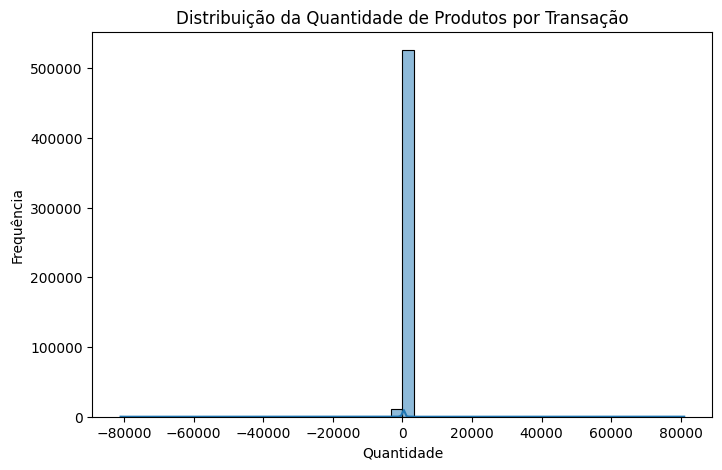

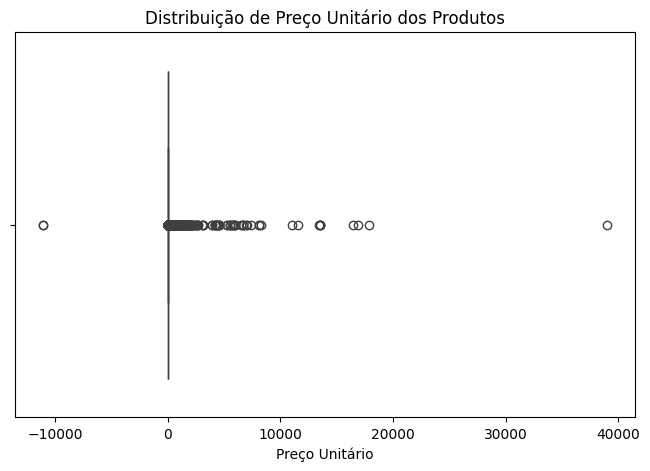

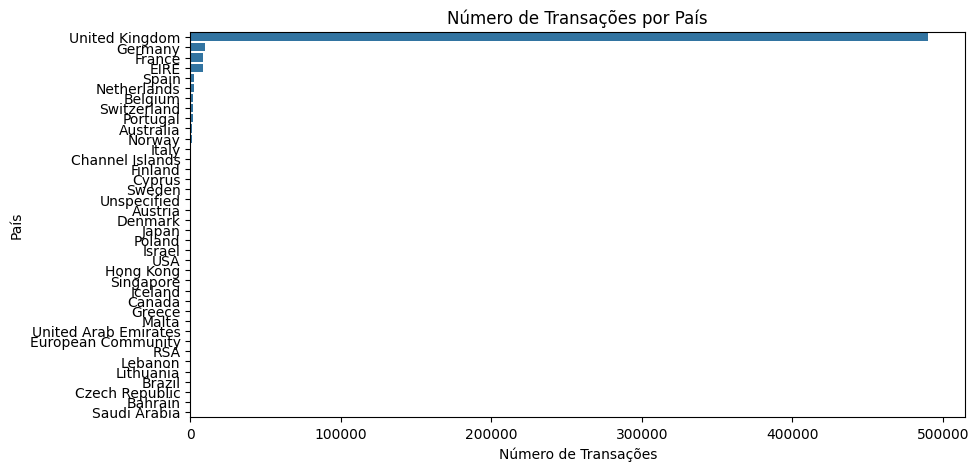

In [21]:
# Importação de bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#  Carregar a base de dados
data = pd.read_csv('data.csv', encoding='latin1')

#  Verificar as primeiras linhas do dataset

#  Exibir as primeiras linhas do dataset para inspeção inicial
print("Visualizando as primeiras linhas do dataset:")
print(data.head())

#  Estatísticas descritivas das colunas numéricas
print("\nDescrição estatística dos dados:")
print(data.describe())

#  Verificação de valores nulos
print("\nContagem de valores nulos por coluna:")
print(data.isnull().sum())

#  Remoção de duplicatas, caso existam
num_duplicados = data.duplicated().sum()
print(f"\nNúmero de registros duplicados encontrados: {num_duplicados}")
if num_duplicados > 0:
    data.drop_duplicates(inplace=True)
    print("Registros duplicados removidos.")

#  Visualizações para análise exploratória**
#  Histograma da distribuição de valores por quantidade de compras
plt.figure(figsize=(8, 5))
sns.histplot(data['Quantity'], bins=50, kde=True)
plt.title('Distribuição da Quantidade de Produtos por Transação')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.show()

#  Boxplot do preço unitário para encontrar possíveis outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['UnitPrice'])
plt.title('Distribuição de Preço Unitário dos Produtos')
plt.xlabel('Preço Unitário')
plt.show()

#  Contagem de transações por país
plt.figure(figsize=(10, 5))
sns.countplot(y=data['Country'], order=data['Country'].value_counts().index)
plt.title('Número de Transações por País')
plt.xlabel('Número de Transações')
plt.ylabel('País')
plt.show()

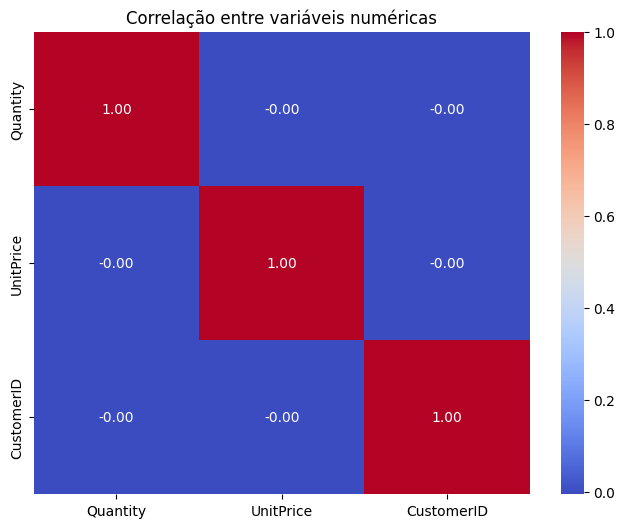

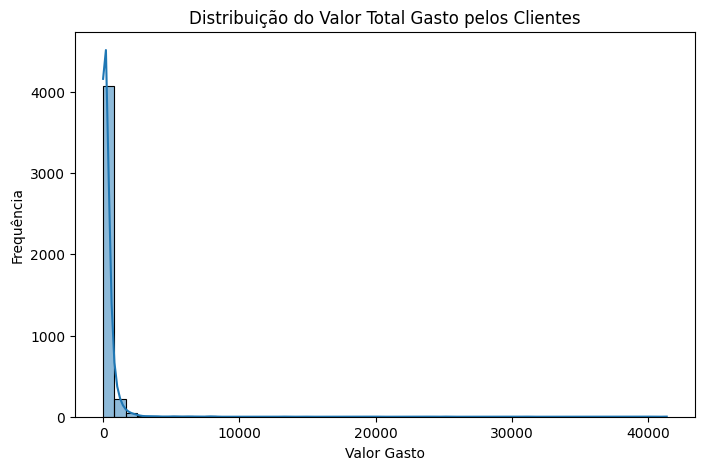

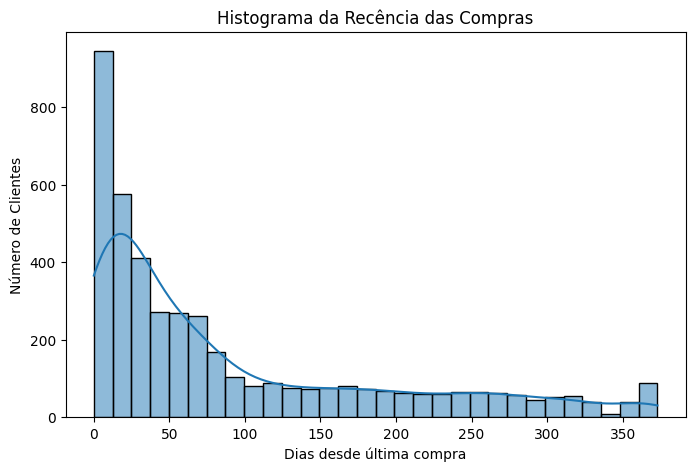

In [22]:
import numpy as np

#  Mapa de calor das correlações entre variáveis numéricas
plt.figure(figsize=(8, 6))
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre variáveis numéricas")
plt.show()

#  Distribuição de gastos por cliente
plt.figure(figsize=(8, 5))
sns.histplot(rfm['Valor'], bins=50, kde=True)
plt.title("Distribuição do Valor Total Gasto pelos Clientes")
plt.xlabel("Valor Gasto")
plt.ylabel("Frequência")
plt.show()

#  Histograma da recência das compras
plt.figure(figsize=(8, 5))
sns.histplot(rfm['Recência'], bins=30, kde=True)
plt.title("Histograma da Recência das Compras")
plt.xlabel("Dias desde última compra")
plt.ylabel("Número de Clientes")
plt.show()

##Passo 2: Pré-processamento dos dados

In [23]:
from datetime import datetime

#  Converter a coluna InvoiceDate para formato datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

#  Remover linhas com valores nulos
data.dropna(subset=['CustomerID'], inplace=True)

#  Criar métricas RFM
latest_date = data['InvoiceDate'].max()
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recência
    'InvoiceNo': 'count',  # Frequência
    'UnitPrice': 'sum'  # Valor total gasto
}).rename(columns={
    'InvoiceDate': 'Recência',
    'InvoiceNo': 'Frequência',
    'UnitPrice': 'Valor'
})

print(rfm.head())

            Recência  Frequência   Valor
CustomerID                              
12346.0          325           2    2.08
12347.0            1         182  481.21
12348.0           74          31  178.71
12349.0           18          73  605.10
12350.0          309          17   65.30


##Passo 3: Aplicação de Clustering

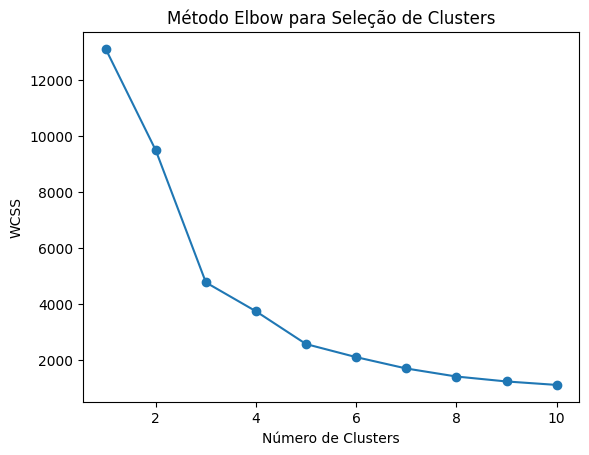

            Recência  Frequência   Valor  Cluster
CustomerID                                       
12346.0          325           2    2.08        1
12347.0            1         182  481.21        0
12348.0           74          31  178.71        0
12349.0           18          73  605.10        0
12350.0          309          17   65.30        1


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#  Normalizar os dados para melhorar a performance do clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

#  Encontrar o número ideal de clusters com método Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('Método Elbow para Seleção de Clusters')
plt.show()

#  Aplicação do K-Means com a quantidade ideal de clusters (exemplo: 4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

print(rfm.head())

##Passo 4: Análise dos Clusters

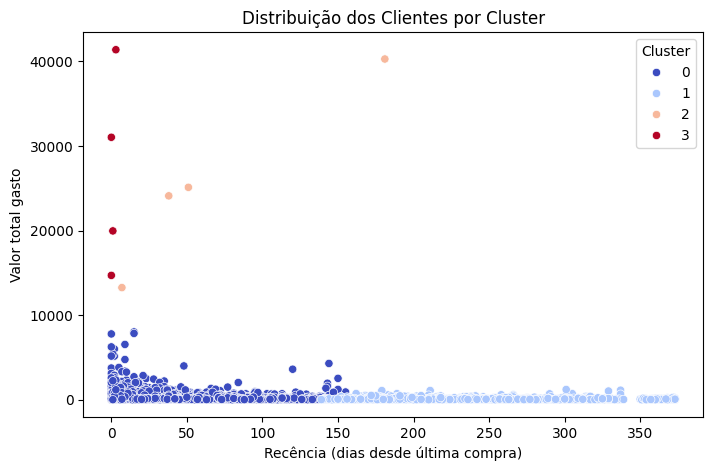

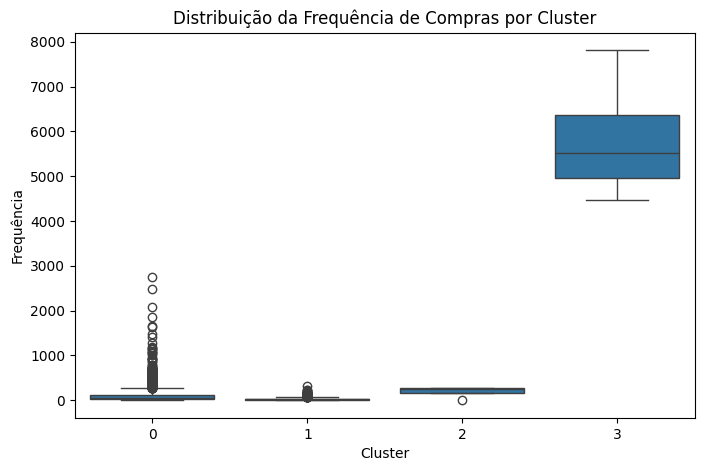

In [25]:
#  Gráfico de dispersão dos clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=rfm, x='Recência', y='Valor', hue='Cluster', palette='coolwarm')
plt.title('Distribuição dos Clientes por Cluster')
plt.xlabel('Recência (dias desde última compra)')
plt.ylabel('Valor total gasto')
plt.show()

#  Boxplot para comparar a frequência de compras por cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='Frequência', data=rfm)
plt.title('Distribuição da Frequência de Compras por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequência')
plt.show()


Distribuição percentual dos clientes por cluster:
Cluster
0    74.748399
1    25.068618
2     0.091491
3     0.091491
Name: proportion, dtype: float64

Perfil médio dos clientes por cluster:
           Recência   Frequência         Valor
Cluster                                       
0         39.158201   106.382497    329.702192
1        246.175182    27.255474     98.476479
2         69.250000   194.250000  25686.142500
3          1.000000  5824.250000  26764.075000


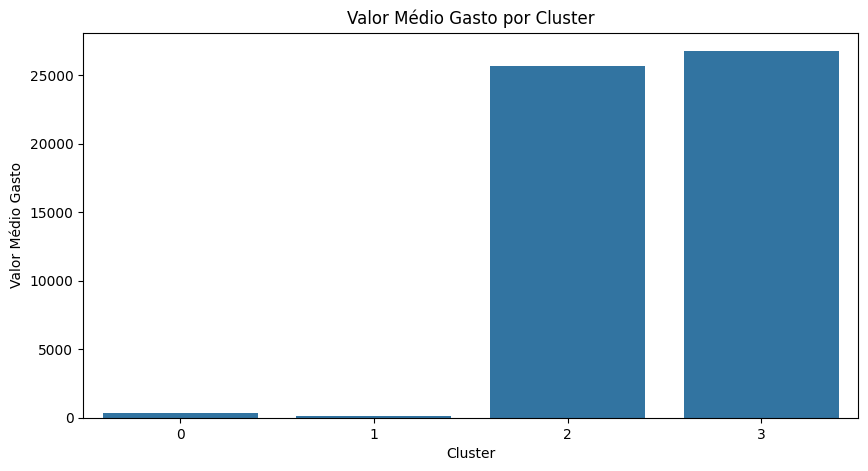

In [26]:
#  Contagem percentual dos clientes por cluster
cluster_counts = rfm['Cluster'].value_counts(normalize=True) * 100
print("\nDistribuição percentual dos clientes por cluster:")
print(cluster_counts)

#  Comparação dos perfis de clientes entre clusters
rfm_grouped = rfm.groupby('Cluster').mean()
print("\nPerfil médio dos clientes por cluster:")
print(rfm_grouped)

#  Visualização dos perfis médios de cada cluster
plt.figure(figsize=(10, 5))
sns.barplot(x=rfm_grouped.index, y=rfm_grouped['Valor'])
plt.title("Valor Médio Gasto por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Valor Médio Gasto")
plt.show()

##Passo 5: Insights para Marketing

##Com os clusters identificados, a empresa pode:

1.   Clientes VIP (alta frequência e alto gasto) → Criar programas de fidelidade, descontos exclusivos.;
2.   Clientes recorrentes (compra média e boa frequência) → Incentivar     compras recorrentes com cupons personalizados;
3.   Clientes novos (compra recente, mas pouca frequência) → Estratégia de onboarding + promoções iniciais;
4.   Clientes inativos (há muito tempo sem compras) → E-mail marketing reativando interesse com ofertas direcionadas.